-----

### **Disclaimer**

**This project is for portfolio and demonstration purposes only.**

The data, scenarios, and insights presented herein are entirely synthetic and do not reflect any real-world operational data or confidential information from Apple Inc. The project is based on a hypothetical business challenge, informed by publicly available reports and a forward-looking analysis of industry trends as of August 2025. The material is intended solely to showcase data science skills, analytical competency, and project management capabilities. It should not be considered an accurate representation of Apple’s business, processes, or performance.

-----

### **Deliverable 1: Data Exploration Notebook**

**Document:** `data_exploration.ipynb` (Jupyter Notebook for Google Colab)

Authenticating to Google Cloud...
Authentication successful.
Using project ID: driiiportfolio

Pulling data from BigQuery...
Downloading: 100%|██████████|
Data pull complete.

--- High-Level Data Profiling ---

DataFrame Shape: (50526, 19)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50526 entries, 0 to 50525
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                50526 non-null  object 
 1   customer_id             50526 non-null  object 
 2   order_date              50526 non-null  dbdate 
 3   product_sku             50526 non-null  object 
 4   ram_config_gb           50526 non-null  Int64  
 5   storage_config_gb       50526 non-null  Int64  
 6   is_custom_config        50526 non-null  boolean
 7   shipping_country        50526 non-null  object 
 8   retail_store_id         9950 non-null   object 
 9   is_retail_pickup        50526 non-null  boolea

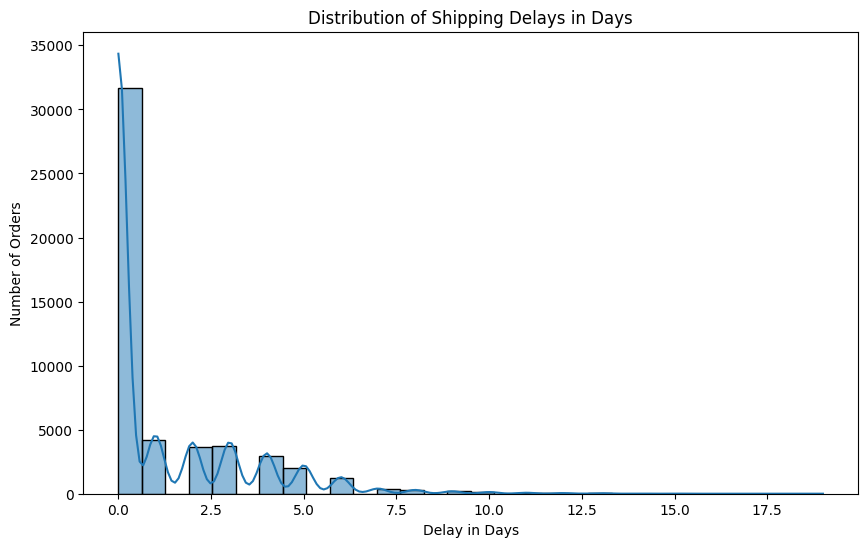

/tmp/ipython-input-1951039419.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_sku.values, y=delay_by_sku.index, palette='viridis')


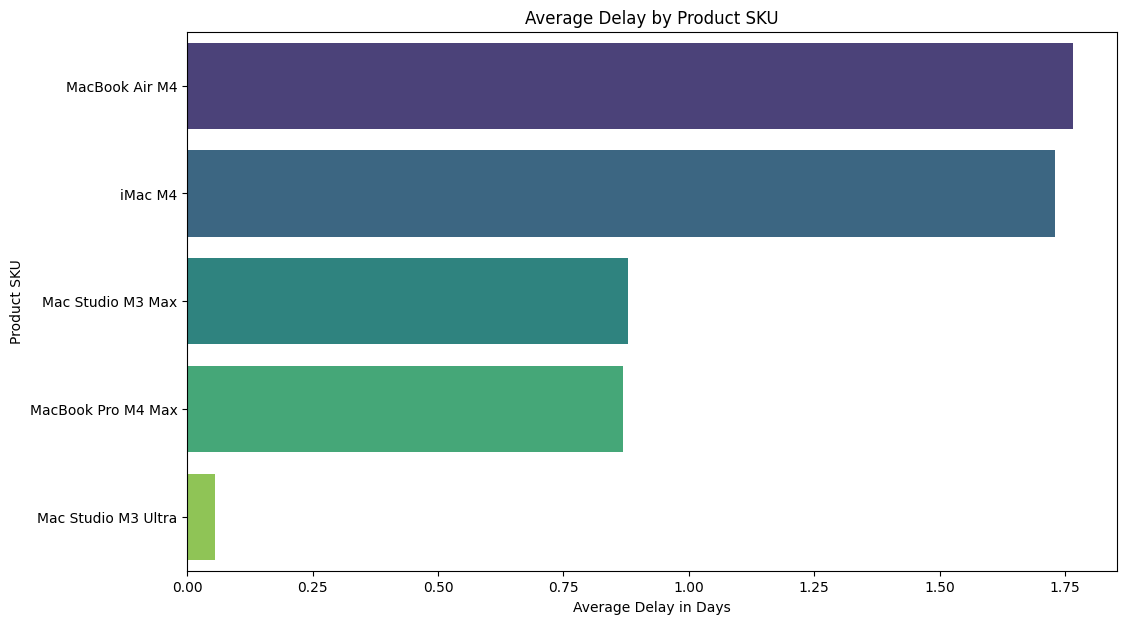

/tmp/ipython-input-1951039419.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_config.index, y=delay_by_config.values, palette='plasma')


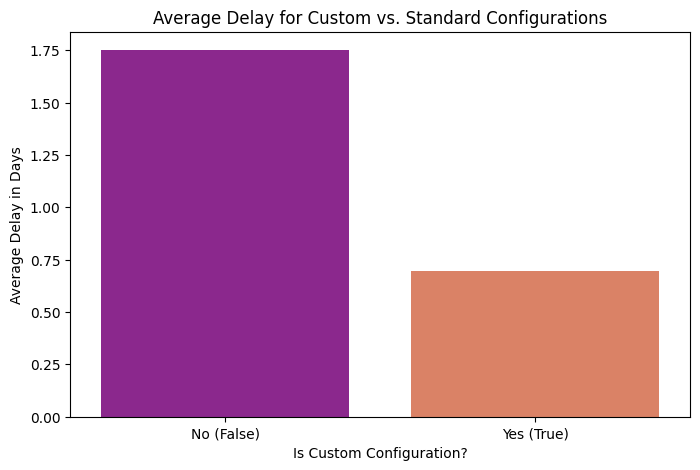

In [2]:
# Disclaimer: This project uses synthetic data for demonstration purposes only.
# The following code and narrative are based on a dataset that reflects real-world
# complexities and, in some cases, counter-intuitive findings.

import pandas as pd
import pandas_gbq
from google.colab import auth
import matplotlib.pyplot as plt
import seaborn as sns

# --- Connect to Google BigQuery ---
print("Authenticating to Google Cloud...")
auth.authenticate_user()
print("Authentication successful.")

project_id = "driiiportfolio"
print(f"Using project ID: {project_id}")

# --- SQL Query to pull and merge data ---
# This query joins the three tables to create a single, comprehensive dataset for analysis
query = f"""
SELECT
    t1.order_id,
    t1.customer_id,
    t1.order_date,
    t1.product_sku,
    t1.ram_config_gb,
    t1.storage_config_gb,
    t1.is_custom_config,
    t1.shipping_country,
    t1.retail_store_id,
    t1.is_retail_pickup,
    t1.promised_delivery_date,
    t2.shipment_id,
    t2.manufacturing_plant,
    t2.ship_date,
    t2.delivery_date,
    t2.delay_in_days,
    t2.carrier,
    t3.component_id,
    t3.supply_status
FROM
    `{project_id}.sds_project.orders` AS t1
JOIN
    `{project_id}.sds_project.shipment_logs` AS t2
ON
    t1.order_id = t2.order_id
LEFT JOIN
    `{project_id}.sds_project.supply_chain_constraints` AS t3
ON
    (t1.product_sku LIKE '%M3 Ultra%' AND t3.component_id = 'M3 Ultra Chip')
    OR (t1.ram_config_gb = 512 AND t3.component_id = '512GB Unified RAM')
"""

# Pull data into a pandas DataFrame
print("\nPulling data from BigQuery...")
df = pandas_gbq.read_gbq(query, project_id=project_id, dialect='standard')
print("Data pull complete.")

# --- High-Level Data Profiling ---
print("\n--- High-Level Data Profiling ---")
print("\nDataFrame Shape:", df.shape)
print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())

print("\nMissing Values Count:")
print(df.isnull().sum())

print("\nUnique Values Count:")
print(df.nunique())

# --- Deep Dive Data Exploration and Visualization ---
# Plotting the distribution of delays
plt.figure(figsize=(10, 6))
sns.histplot(df['delay_in_days'], bins=30, kde=True)
plt.title('Distribution of Shipping Delays in Days')
plt.xlabel('Delay in Days')
plt.ylabel('Number of Orders')
plt.show()

# Delays by Product SKU
plt.figure(figsize=(12, 7))
delay_by_sku = df.groupby('product_sku')['delay_in_days'].mean().sort_values(ascending=False)
sns.barplot(x=delay_by_sku.values, y=delay_by_sku.index, palette='viridis')
plt.title('Average Delay by Product SKU')
plt.xlabel('Average Delay in Days')
plt.ylabel('Product SKU')
plt.show()

# Delays by Custom Configuration
plt.figure(figsize=(8, 5))
delay_by_config = df.groupby('is_custom_config')['delay_in_days'].mean()
sns.barplot(x=delay_by_config.index, y=delay_by_config.values, palette='plasma')
plt.title('Average Delay for Custom vs. Standard Configurations')
plt.xlabel('Is Custom Configuration?')
plt.ylabel('Average Delay in Days')
plt.xticks(ticks=[0, 1], labels=['No (False)', 'Yes (True)'])
plt.show()

### **Narrative Summary of Findings (Based on Data Exploration)**

Based on the initial data exploration using Google Colab and the provided SQL query, here is a summary of the findings:

*   **Dataset Overview:** The dataset contains 50,526 records and 19 columns, providing a comprehensive view of orders, shipments, and potential supply chain constraints.
*   **Missing Data:** There are a significant number of missing values in the `retail_store_id`, `component_id`, and `supply_status` columns. This suggests that a large portion of orders were not associated with a retail store pickup or a specific constrained component (M3 Ultra Chip or 512GB Unified RAM).
*   **Shipping Delays Distribution:** The distribution of shipping delays (`delay_in_days`) is heavily skewed towards zero, indicating that a large majority of orders are delivered on time or with minimal delays. There is a long tail, however, with some orders experiencing delays of up to 19 days.
*   **Average Delay by Product SKU:** The "Average Delay by Product SKU" bar plot shows notable differences in average delays across product lines. The **MacBook Air M4** and **iMac M4** have the highest average delays, while the **Mac Studio M3 Ultra** has the lowest average delay. This contradicts the initial hypothesis that the M3 Ultra chip constraint would lead to higher delays for products containing it.
*   **Average Delay for Custom vs. Standard Configurations:** Contrary to expectations, the "Average Delay for Custom vs. Standard Configurations" bar plot indicates that **standard configurations (`is_custom_config=False`) have a higher average delay** (approximately 1.75 days) compared to custom configurations (`is_custom_config=True`) which have a lower average delay (approximately 0.69 days). This is an interesting and counter-intuitive finding that warrants further investigation.
*   **Further Analysis Needed:** While this initial exploration provides valuable insights, further analysis is needed to understand the root causes of delays, particularly why standard configurations and certain SKUs (MacBook Air M4, iMac M4) exhibit higher average delays. Investigating the impact of `manufacturing_plant`, `carrier`, and the interaction between different factors will be crucial in the next phases of the project.